In [0]:
#https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html 
!pip install statsmodels

In [0]:

from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [0]:
from statsmodels.graphics.api import qqplot

In [0]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [0]:

dta = sm.datasets.sunspots.load_pandas().data

In [0]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

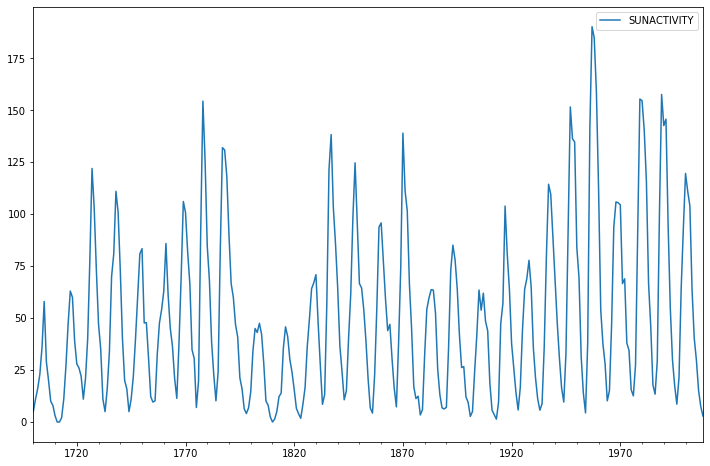

In [0]:
dta.plot(figsize=(12,8));

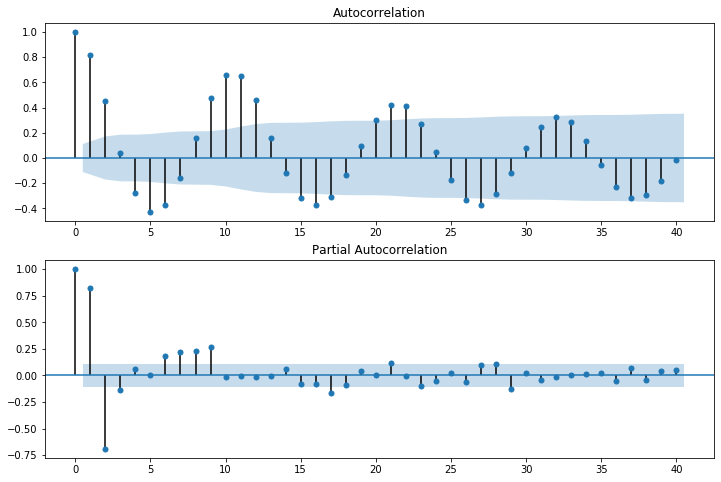

In [0]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [0]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)

const                49.659389
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [0]:
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [0]:

print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.636338063704 2637.569703171295 2628.60672590895


In [0]:

print(arma_mod30.params)

const                49.749977
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129650
dtype: float64


In [0]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2619.4036286965793 2638.070335081068 2626.8666135031367


In [0]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.956480935071552

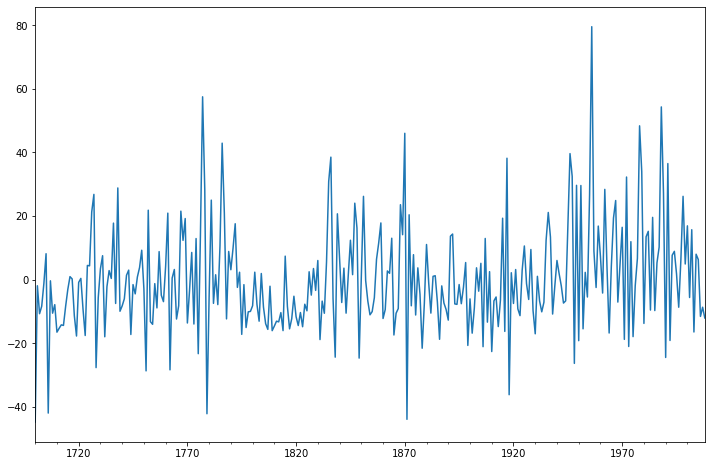

In [0]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [0]:

resid = arma_mod30.resid

In [0]:
stats.normaltest(resid)

NormaltestResult(statistic=49.84499867475388, pvalue=1.5007075329892837e-11)

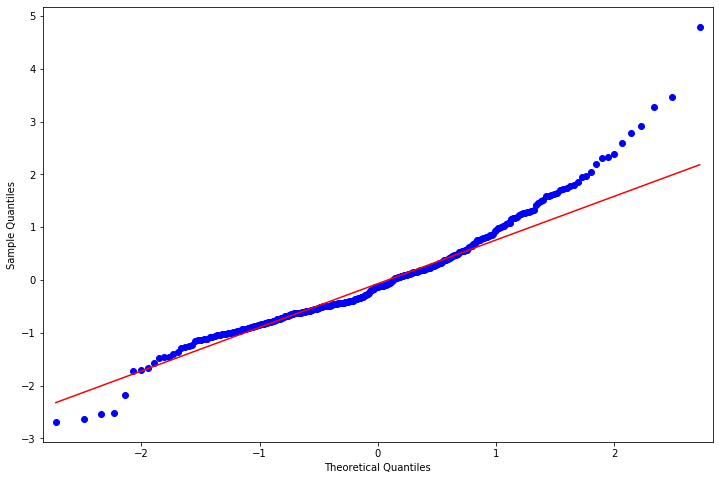

In [0]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

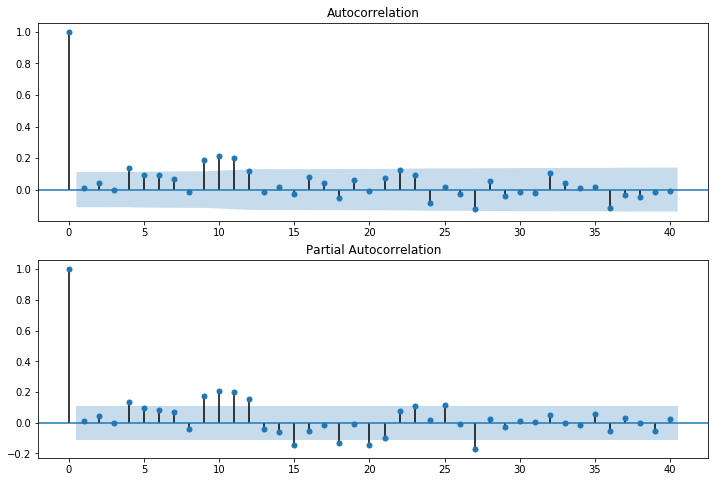

In [0]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [0]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.009179   0.026286  8.712038e-01
2.0   0.041793   0.573041  7.508716e-01
3.0  -0.001335   0.573601  9.024484e-01
4.0   0.136089   6.408930  1.706198e-01
5.0   0.092468   9.111844  1.046854e-01
6.0   0.091948  11.793265  6.674294e-02
7.0   0.068748  13.297225  6.518929e-02
8.0  -0.015020  13.369253  9.976058e-02
9.0   0.187592  24.641930  3.393883e-03
10.0  0.213718  39.322010  2.229460e-05
11.0  0.201082  52.361148  2.344939e-07
12.0  0.117182  56.804199  8.574222e-08
13.0 -0.014055  56.868335  1.893895e-07
14.0  0.015398  56.945575  3.997641e-07
15.0 -0.024967  57.149329  7.741440e-07
16.0  0.080916  59.296783  6.872127e-07
17.0  0.041138  59.853753  1.110937e-06
18.0 -0.052021  60.747443  1.548424e-06
19.0  0.062496  62.041706  1.831633e-06
20.0 -0.010302  62.076994  3.381224e-06
21.0  0.074453  63.926666  3.193572e-06
22.0  0.124955  69.154780  8.978324e-07
23.0  0.093162  72.071042  5.799765e-07


In [0]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

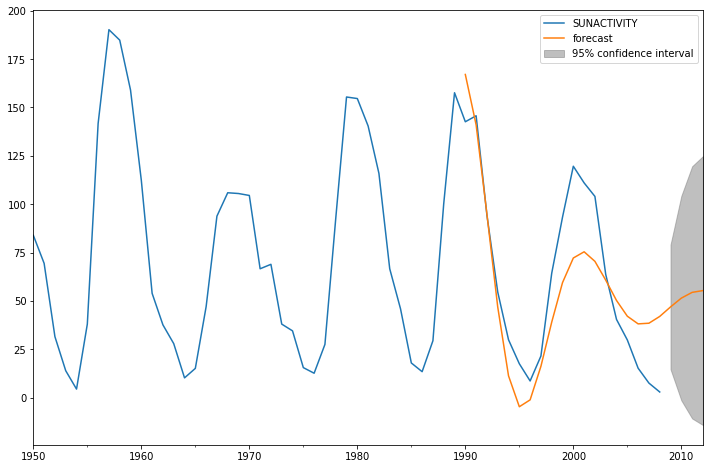

In [0]:

fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)

In [0]:

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [0]:
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

NameError: ignored